# 1.Model architectures and training phase
This section deals with the models creation, the performance results and the dicussion of them.





In [1]:
!pip install numpy opencv-python matplotlib

In [2]:
!pip install --upgrade tensorflow

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

In [6]:
from sklearn.model_selection import train_test_split

# Data Loading

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Step 2: Define the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/flower_photos.tgz'  # Replace with your actual path

In [10]:
# Step 3: Unzip the .tgz file
import tarfile

In [11]:
# Open the .tgz file using tarfile
with tarfile.open(zip_file_path, 'r:gz') as tar:
    # Extract all contents to the desired directory (e.g., "/content/")
    tar.extractall('/content/')


In [12]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the directory path where the images are stored
image_dir = '/content/flower_photos/'  # Change this to the actual path

# List all image files in the directory
image_files = os.listdir(image_dir)



In [ ]:
image_files

['sunflowers', 'daisy', 'LICENSE.txt', 'dandelion', 'tulips', 'roses']

In [ ]:
image_dir

'/content/flower_photos/'

In [ ]:
from PIL import Image
import glob
import os

# Define the directory path where the images are stored
image_dir = '/content/flower_photos/'  # Change this to the actual path

# Use glob to get a list of all image file paths in the 'photos' folder and its subfolders
image_file_paths = glob.glob(os.path.join(image_dir, '**', '*.jpg'), recursive=True)
# Change '*.jpg' to the appropriate file extension if your images have a different format.

# Load images into a list
images = []
for file_path in image_file_paths:
    with Image.open(file_path) as img:
        images.append(img.copy())  # Use img.copy() to prevent issues with the context manager

# Now the images list contains all the images properly loaded and closed.


In [ ]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7837CBBAF880>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x240 at 0x7837CBBAE050>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7837CBBDF1F0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x213 at 0x7837CBBDF250>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x250 at 0x7837CBBDF2B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240 at 0x7837CBBDE590>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332 at 0x7837CBBDE530>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x240 at 0x7837CBBDE4D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7837CBBDE470>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x213 at 0x7837CBBDE410>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x281 at 0x7837CBBDE200>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x240 at 0x7837CBB

In [ ]:
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Getting IMages, Labels, and class names from the directory folder

In [13]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# Define the directory path where the images are stored
image_dir = '/content/flower_photos/'  # Change this to the actual path

# Load and preprocess the image data
def preprocess_images(folder_path, image_size=(224, 224)):
    images = []
    labels = []
    class_names = []

    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            for image_file in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_file)
                img = Image.open(image_path)
                img = img.resize(image_size)
                img_array = np.array(img)
                images.append(img_array)
                labels.append(class_name)
                if class_name not in class_names:
                    class_names.append(class_name)

    # Convert the labels to numerical values using LabelEncoder
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(labels)
    y = np.array(Y)

    # Convert the list of images to a NumPy array
    X = np.array(images)

    return X, y, class_names

# Load and preprocess the images and labels
X, y, class_names = preprocess_images(image_dir)

# Verify the shape of X and Y
print("Shape of X:", X.shape)  # (num_samples, 180, 180, 3) for RGB images
print("Shape of Y:", y.shape)  # (num_samples,) representing the labels as numerical values
print("Class names:", class_names)  # List of class names (folder names)

# Now, you can use X and Y as input data and target data for your model.
# The images have been resized to 180x180, and Y contains the labels represented as numerical values.


Shape of X: (3670, 224, 224, 3)
Shape of Y: (3670,)
Class names: ['tulips', 'dandelion', 'daisy', 'roses', 'sunflowers']


In [ ]:
# preprocessing of data

In [17]:
x=X/255        # scaling of each image pixel

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded in 'x' and 'Y'
# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

# Create a Sequential model for data augmentation
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=x_train.shape[1:]),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    #layers.experimental.preprocessing.RandomContrast(0.2),
    #layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
])

# Create TensorFlow datasets for training, validation, and testing
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Add a batch dimension to the input data before applying data augmentation
train_dataset = train_dataset.map(lambda x, y: (tf.expand_dims(x, 0), y))
validation_dataset = validation_dataset.map(lambda x, y: (tf.expand_dims(x, 0), y))

# Apply data augmentation to the training dataset
train_dataset = train_dataset.shuffle(buffer_size=len(x_train))
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
train_dataset = train_dataset.batch(batch_size=16)

# Apply data augmentation to the validation dataset (optional)
validation_dataset = validation_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
validation_dataset = validation_dataset.batch(batch_size=16)

# Now, you can use the augmented training and validation datasets in your model training


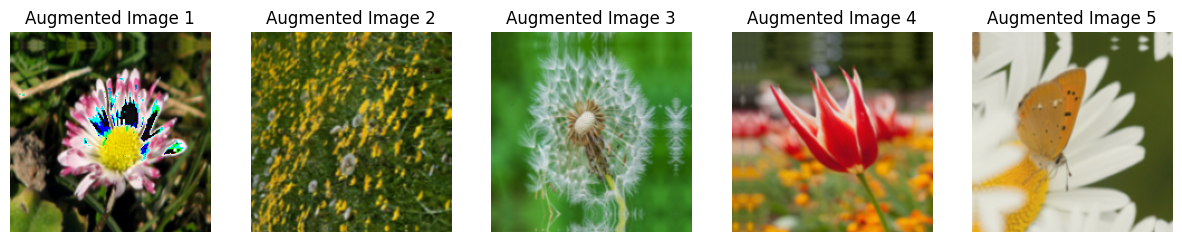

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already created the augmented training dataset as 'train_dataset'

# Extract a batch of augmented images from the dataset
for batch in train_dataset.take(1):
    augmented_images = batch[0]  # First element in the batch is the augmented images
    original_labels = batch[1]   # Second element in the batch is the corresponding labels

# Convert the random indices to a TensorFlow tensor
num_images_to_visualize = 5
random_indices = np.random.choice(len(augmented_images), num_images_to_visualize, replace=False)
random_indices_tensor = tf.constant(random_indices)

# Select the images at the random indices for visualization
selected_images = tf.gather(augmented_images, random_indices_tensor)

# Create a grid to visualize the images
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(15, 3))

# Plot the images
for i, image in enumerate(selected_images):
    image = tf.squeeze(image)  # Remove the batch dimension (squeeze)
    image = (image.numpy() * 255).astype(np.uint8)  # Scale the image back to [0, 255]
    axes[i].imshow(image)
    axes[i].set_title(f"Augmented Image {i+1}")
    axes[i].axis("off")

plt.show()


In [ ]:
num_classes = 5
model = keras.Sequential([
    data_augmentation,  # Include data augmentation as the first layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)      

In [ ]:
"""import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


# Create TensorFlow datasets for training and testing
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Add a batch dimension to the input data before applying data augmentation
train_dataset = train_dataset.map(lambda x, y: (tf.expand_dims(x, 0), y))

# Apply data augmentation to the training dataset
train_dataset = train_dataset.shuffle(buffer_size=len(x_train))
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
train_dataset = train_dataset.batch(batch_size=16)  # Adjust batch_size as needed

# Fit the model on the augmented training dataset
model.fit(train_dataset, epochs=50)"""



In [ ]:
# Define a generator function for training data
"""def data_generator(x_train, y_train, batch_size):
    num_samples = len(x_train)
    indices = np.arange(num_samples)

    while True:
        np.random.shuffle(indices)

        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            batch_x = x_train[batch_indices]
            batch_y = y_train[batch_indices]
            yield batch_x, batch_y

# Define batch size and create the data generator
batch_size = 16
train_generator = data_generator(x_train, y_train, batch_size)

# Fit the model using the data generator
steps_per_epoch = len(x_train) // batch_size
model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch)"""


In [ ]:
# Define a generator function for training data
def data_generator(x_train, y_train, batch_size):
    num_samples = len(x_train)
    indices = np.arange(num_samples)

    while True:
        np.random.shuffle(indices)

        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            batch_x = x_train[batch_indices]
            batch_y = y_train[batch_indices]
            yield batch_x, batch_y

# Define batch size and create the data generator
batch_size = 16
train_generator = data_generator(x_train, y_train, batch_size)

# Fit the model using the data generator and include validation data
steps_per_epoch = len(x_train) // batch_size
validation_dataset = (x_val, y_val)  # Use the validation data you already have

model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch, validation_data=validation_dataset)


Epoch 1/10
146/146 [==============================] - 240s 2s/step - loss: 1.2220 - accuracy: 0.4739 - val_loss: 1.0154 - val_accuracy: 0.6037
Epoch 2/10
146/146 [==============================] - 280s 2s/step - loss: 1.0519 - accuracy: 0.5780 - val_loss: 0.9224 - val_accuracy: 0.6446
Epoch 3/10
146/146 [==============================] - 235s 2s/step - loss: 0.9663 - accuracy: 0.6214 - val_loss: 0.9201 - val_accuracy: 0.6429
Epoch 4/10
146/146 [==============================] - 231s 2s/step - loss: 0.9232 - accuracy: 0.6308 - val_loss: 0.9637 - val_accuracy: 0.6241
Epoch 5/10
146/146 [==============================] - 228s 2s/step - loss: 0.8715 - accuracy: 0.6574 - val_loss: 0.8530 - val_accuracy: 0.6616
Epoch 6/10
146/146 [==============================] - 230s 2s/step - loss: 0.8330 - accuracy: 0.6775 - val_loss: 0.8256 - val_accuracy: 0.6956
Epoch 7/10
146/146 [==============================] - 229s 2s/step - loss: 0.8112 - accuracy: 0.6900 - val_loss: 0.9052 - val_accuracy: 0.6497

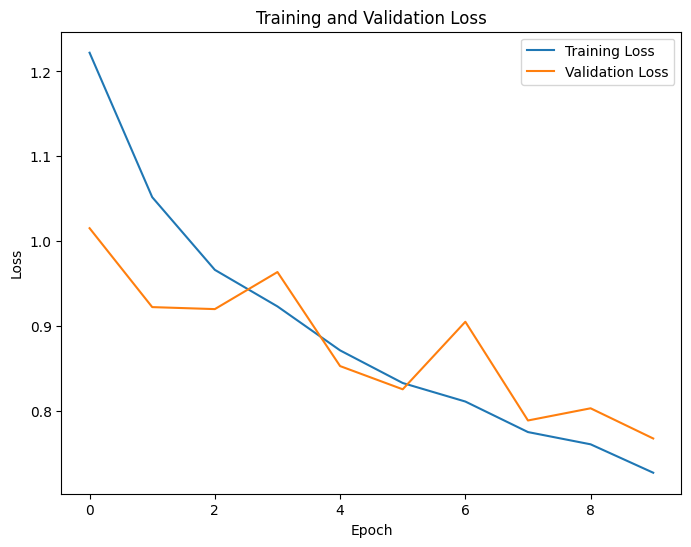

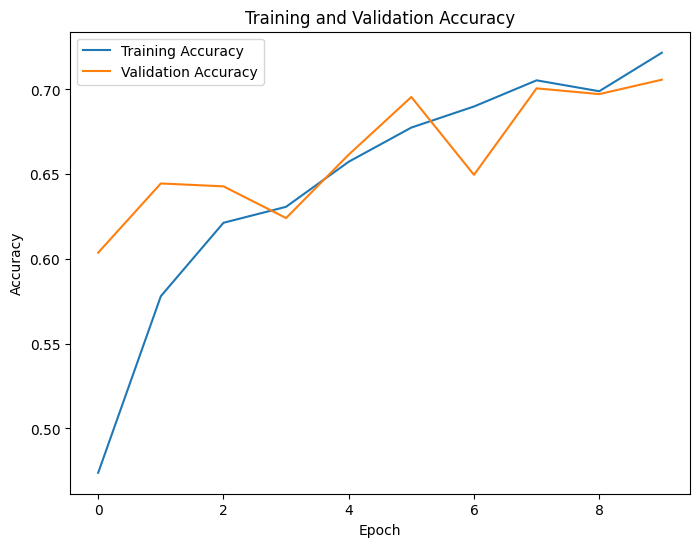

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model using the code provided earlier

# Get the training history from the model
history = model.history.history

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
# Assuming you have already trained the model and have x_test and y_test ready

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


23/23 [==============================] - 16s 683ms/step - loss: 0.8075 - accuracy: 0.6975
Test Loss: 0.8075
Test Accuracy: 0.6975


In [ ]:
import numpy as np

# Assuming you have already trained the model and have x_test ready

# Get some randomly chosen indices from the test dataset
num_images_to_predict = 5
random_indices = np.random.choice(len(x_test), num_images_to_predict, replace=False)
selected_images = x_test[random_indices]

# Make predictions on the selected images
predictions = model.predict(selected_images)

# Convert predictions to class labels (if you have a classification problem)
predicted_classes = np.argmax(predictions, axis=1)

# Display the predictions
for i in range(num_images_to_predict):
    print(f"Image {i+1}:")
    print(f"True Label: {y_test[random_indices[i]]}")
    print(f"Predicted Class: {predicted_classes[i]}")
    print("\n")


1/1 [==============================] - 0s 321ms/step
Image 1:
True Label: 4
Predicted Class: 2


Image 2:
True Label: 4
Predicted Class: 4


Image 3:
True Label: 3
Predicted Class: 1


Image 4:
True Label: 3
Predicted Class: 3


Image 5:
True Label: 1
Predicted Class: 1




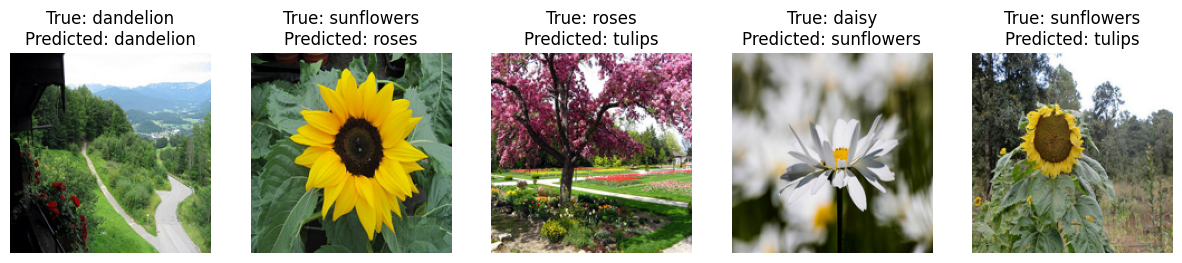

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have x_test, y_test, and predicted_classes ready

# Get some randomly chosen indices from the test dataset
num_images_to_predict = 5
random_indices = np.random.choice(len(x_test), num_images_to_predict, replace=False)
selected_images = x_test[random_indices]
true_labels = y_test[random_indices]
predicted_classes = np.argmax(predictions, axis=1)

# Create a mapping for class labels (if applicable)

# Display the images with true and predicted labels
plt.figure(figsize=(15, 10))
for i in range(num_images_to_predict):
    plt.subplot(1, num_images_to_predict, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPredicted: {class_names[predicted_classes[i]]}")
    plt.axis("off")

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have already trained the model and have x_test, y_test, and predicted_classes ready

# Make predictions on the test dataset using the trained Keras model
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Print the classification report
 # Replace with your class names
print(classification_report(y_test, predicted_classes, target_names=class_names))


23/23 [==============================] - 16s 681ms/step
              precision    recall  f1-score   support

       daisy       0.68      0.76      0.71       127
      tulips       0.74      0.77      0.76       179
   dandelion       0.53      0.63      0.58       128
  sunflowers       0.82      0.84      0.83       140
       roses       0.72      0.50      0.59       160

    accuracy                           0.70       734
   macro avg       0.70      0.70      0.69       734
weighted avg       0.70      0.70      0.70       734



In [ ]:
##### CNN MOdel VGG 19

In [ ]:
# Assuming you have already loaded and preprocessed 'X' and 'Y' as input data and target data
# X should be a NumPy array containing the resized images (num_samples, 180, 180, 3)
# Y should be a NumPy array containing the labels of flower categories (num_samples,)


In [ ]:
import tensorflow as tf
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy


In [ ]:
# Load the VGG19 model (excluding the fully connected layers at the top)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Add custom layers on top of VGG19
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base VGG19 model
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
X

array([[[[230, 198,   2],
         [231, 197,   2],
         [230, 197,   1],
         ...,
         [162, 234, 251],
         [161, 234, 250],
         [160, 233, 250]],

        [[231, 200,   0],
         [232, 199,   0],
         [233, 200,   0],
         ...,
         [164, 235, 250],
         [162, 234, 249],
         [161, 234, 249]],

        [[230, 199,   0],
         [231, 198,   0],
         [232, 199,   0],
         ...,
         [166, 235, 251],
         [164, 236, 251],
         [164, 236, 251]],

        ...,

        [[226, 185,   2],
         [227, 181,   4],
         [231, 189,   2],
         ...,
         [125, 143,  82],
         [116, 136,  85],
         [104, 127,  85]],

        [[224, 182,   0],
         [224, 188,   0],
         [245, 221,   6],
         ...,
         [121, 140,  81],
         [115, 136,  83],
         [106, 130,  84]],

        [[225, 182,   5],
         [245, 220,   5],
         [254, 244,   3],
         ...,
         [126, 146,  83],
        

In [ ]:
y

array([3, 3, 3, ..., 2, 2, 2])

In [ ]:
#### NOT applied YET
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded in 'x' and 'Y'
# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

# Create a Sequential model for data augmentation
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=x_train.shape[1:]),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    #layers.experimental.preprocessing.RandomContrast(0.2),
    #layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
])

# Create TensorFlow datasets for training, validation, and testing
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Add a batch dimension to the input data before applying data augmentation
train_dataset = train_dataset.map(lambda x, y: (tf.expand_dims(x, 0), y))
validation_dataset = validation_dataset.map(lambda x, y: (tf.expand_dims(x, 0), y))

# Apply data augmentation to the training dataset
train_dataset = train_dataset.shuffle(buffer_size=len(x_train))
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
train_dataset = train_dataset.batch(batch_size=16)

# Apply data augmentation to the validation dataset (optional)
validation_dataset = validation_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
validation_dataset = validation_dataset.batch(batch_size=16)

# Now, you can use the augmented training and validation datasets in your model training


In [ ]:
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [7]:
import tensorflow as tf

In [8]:
tf.__version__

'2.13.0'

In [9]:
len(tf.config.experimental.list_physical_devices('GPU'))

0

In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////